# Bibliotecas

In [1]:
import numpy as np
import pandas as pd

In [2]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go 

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [6]:
import folium
import branca

# Direcciones

### DIRECCIÓN DEL CSV DE DATOS SATELLITE UBICACIÓN FOTÓEMTROS

Indicar carpeta ubicación de la Satellite_records.csv creada por el script de descarga de los datos de satellite

In [7]:
input_satellite_fotometros=r'C:\Users\borja\OneDrive\Escritorio\Trabajo\EELabs\Datos_CSVs\Articulo\Satellite_records.csv'

### DIRECCIÓN DEL CSV DE DATOS SATELLITE VALVERDE BURGUILLOS

Indicar carpeta ubicación del archivo de los datos del VIIRS de Valverde

In [8]:
input_satellite_valverde=r'C:\Users\borja\OneDrive\Escritorio\Trabajo\EELabs\Datos_CSVs\Articulo\Data_tile_VIIRS.csv'

### DIRECCIÓN DE CARPETA DATOS SCRIPT DESCARGA EELabs

Indicar carpeta ubicación de la carpeta Datos_fotometros creada por el script de descarga de los datos de los fotómetros de EELabs

In [9]:
input_EELAbs=r'C:\Users\borja\OneDrive\Escritorio\Trabajo\EELabs\Datos_CSVs\Articulo\Photometer_data'

### DIRECCIÓN DE GUARDADO DE LOS DATOS DE LAS FIGUARAS

Poner la carpeta donde se quieran guardar las figuras

In [10]:
output=r'C:\Users\borja\OneDrive\Escritorio\Trabajo\EELabs\Datos_CSVs\Articulo\Figuras'

# Datos satelite

In [11]:
Registros_cor=pd.read_csv(input_satellite_fotometros)

In [12]:
Registros_corr_r=Registros_cor[['name','DNB_BRDF_Corrected_NTL','Cloud_Detection_Results','Shadow_Detected','Cirrus_Detection','Date']]

In [13]:
Registros_corr_F=Registros_corr_r[(Registros_corr_r['Cloud_Detection_Results']=='Confident_clear') & (Registros_corr_r['Shadow_Detected']=='No') & (Registros_corr_r['Cirrus_Detection']=='No_cloud')]

In [14]:
Registros_corr_F=Registros_corr_F.dropna()

In [15]:
Registros_corr_F['DNB_BRDF_Corrected_NTL_log']=np.log10(Registros_corr_F['DNB_BRDF_Corrected_NTL'])

c:\Users\borja\anaconda3\envs\EELabs2\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
R=Registros_corr_F.groupby(['name']).median()
Sat=pd.DataFrame(R.index)
Sat['DNB_BRDF_Corrected_NTL_P50']=R['DNB_BRDF_Corrected_NTL'].values
Sat['DNB_BRDF_Corrected_NTL_log_P50']=R['DNB_BRDF_Corrected_NTL_log'].values
Sat['Q1_sat']=Registros_corr_F.groupby(['name']).quantile(.25)['DNB_BRDF_Corrected_NTL_log'].values
Sat['Q3_sat']=Registros_corr_F.groupby(['name']).quantile(.75)['DNB_BRDF_Corrected_NTL_log'].values
Sat['E_sist_sat']=0.1/(Sat['DNB_BRDF_Corrected_NTL_P50']*np.log(10))
Sat=Sat[['name','DNB_BRDF_Corrected_NTL_log_P50','Q1_sat','Q3_sat','E_sist_sat']]

C:\Users\borja\AppData\Local\Temp\ipykernel_7472\3028604821.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  Sat['Q1_sat']=Registros_corr_F.groupby(['name']).quantile(.25)['DNB_BRDF_Corrected_NTL_log'].values
C:\Users\borja\AppData\Local\Temp\ipykernel_7472\3028604821.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  Sat['Q3_sat']=Registros_corr_F.groupby(['name']).quantile(.75)['DNB_BRDF_Corrected_NTL_log'].values


Menores de 500 datos aplicando filtro galaxia y zodiacal a luminosos y oscuros. El listado se obteien del notebook Paper_1

In [17]:
Menores500={'LPL15_004','LPL15_009','LPL15_011','LPL15_014','LPL15_015','LPL15_017','LPL15_018','LPL15_021','LPL15_022','LPL15_023','LPL15_024','LPL15_025','LPL15_026','LPL15_027','LPL15_029','LPL15_030','LPL15_031','LPL15_032','LPL15_035','LPL15_040','LPL16_001','LPL16_003','LPL1_004','LPL1_009','LPL1_010','LPL1_023','LPL1_049','LPL2_003','LPL2_004','LPL2_020','LPL2_025','LPL2_026','LPL3_101','LPL3_102','LPL3_103','LPL3_106','LPL3_112','LPL3_114','LPL3_118','LPL3_121','LPL3_123','LPL3_125','LPL4_103','LPL4_107','LPL4_114','LPL4_115','LPL4_116','LPL5_112','LPL8_005','LW_374','LW_391','LW_397','SG_088','SG_226','stars201','stars218','stars238','stars250','stars258','stars259','stars262','stars275','stars315','stars337','stars34','stars355','stars379','stars384','stars387','stars4','stars464','stars465','stars467','stars490','stars498','stars517','stars554','stars609','stars654','stars662','stars665','stars768','stars773','stars774','stars780','stars788','stars791','stars88','stars983'}

# Fotomeros

In [18]:
Fotometros_registros=pd.DataFrame()
for i in range(1,4):
    A=pd.read_csv(input_EELAbs+'\Records\Records_'+str(i)+'.csv')
    Fotometros_registros=pd.concat([Fotometros_registros,A])

In [19]:
Fotometros=pd.read_csv(input_EELAbs+'\All_devices.csv')
Fotometros=Fotometros.drop_duplicates()

# Reevaluación filtro galaxia

Filtar por luna y nubes, y los fotómetros con menos de 500 datos. También stars679 y stars4 por ser fotómetros anómalos

In [20]:
data=Fotometros_registros[(Fotometros_registros['clouds']==False) & (Fotometros_registros['moon']==False)]

In [21]:
data=data[~data['name'].isin(Menores500|{'stars679'}|{'stars4'})]

Añade el día procurando que correspondan a una única noche, es decir si la noche coincide con el cambio de día lo enmarcar todo en el mismo

In [22]:
data['time']=pd.to_datetime(data['time'])
data['hora']=data['time'].dt.hour
c=data.groupby(['name']).min()[['hora']]
c[c['hora']==0]=-1
c[c['hora']>-1]=0
c[c['hora']==-1]=1
data_2=data.merge(c,right_on=['name'],left_on=['name'])
data_2[data_2['hora_x']<12]['hora_x']=1
data_2.loc[data_2['hora_x']<12, 'hora_x']=1
data_2.loc[data_2['hora_x']>12, 'hora_x']=0
data_2['dia']=data_2['time'].dt.dayofyear-data_2['hora_x']*data_2['hora_y']
data_2=data_2[list(data_2.columns[:7])+['dia']]

C:\Users\borja\AppData\Local\Temp\ipykernel_7472\3207899305.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2[data_2['hora_x']<12]['hora_x']=1


Función para calcular las P50 diarias cuando hay galaxia y cuando no

In [23]:
def P50_diarias_galaxia(galaxy_bool):
    p50=data_2[data_2['galaxy']==galaxy_bool].groupby(['name','dia']).median()[['mag']]
    n=data_2[data_2['galaxy']==galaxy_bool].groupby(['name','dia']).count()[['mag']]
    Q1=data_2[data_2['galaxy']==galaxy_bool][['name','dia','mag']].groupby(['name','dia']).quantile(.25)[['mag']]
    Q3=data_2[data_2['galaxy']==galaxy_bool][['name','dia','mag']].groupby(['name','dia']).quantile(.75)[['mag']]
    df=pd.DataFrame(list(p50.index))
    df['P50']=p50['mag'].values
    df['n']=n['mag'].values
    df['Q1']=Q1['mag'].values
    df['Q3']=Q3['mag'].values
    df['Q3-Q1']=(df['Q3']-df['Q1'])/2
    if galaxy_bool:
        string='con'
    else:
        string='sin'
    df.columns=list(df.columns[:2])+[i+'_'+string for i in list(df.columns[2:])]
    return df
    

Crea un dataset P50 sin galaxia y la diferencia con galaxia y sin ella diarios y por fotómetro

In [24]:
galaxia=P50_diarias_galaxia(True).merge(P50_diarias_galaxia(False),left_on=[0,1],right_on=[0,1])
galaxia['Sin-con']=galaxia['P50_sin']-galaxia['P50_con']
galaxia['E_Sin-con']=np.sqrt(galaxia['Q3-Q1_sin']**2+galaxia['Q3-Q1_con']**2)
galaxia['E_sin']=galaxia['Q3-Q1_sin']
galaxia=galaxia.merge(Fotometros[['name','TYPE']],right_on='name',left_on=0)
galaxia['n_min']=galaxia['TYPE'].replace('SG',10).replace('TESS-W',50)
galaxia=galaxia[(galaxia['n_con']>galaxia['n_min']) & (galaxia['n_sin']>galaxia['n_min'])]
galaxia=galaxia[[0,1,'P50_sin','E_sin','Sin-con','E_Sin-con','TYPE']]

Realizamos la agrupación por fotómetro

In [25]:
G=galaxia.groupby([0]).mean()
G=G[['P50_sin','Sin-con']]
G=G.reset_index()
G.columns=['name','P50_sin_media','Sin-con_media']
G=G.merge(galaxia.groupby([0]).std()[['Sin-con','P50_sin']],left_on='name',right_on=0)
G.columns=list(G.columns)[:-2]+['std_Sin-con','std_sin']
G=G.merge(galaxia.groupby([0]).count()[['Sin-con','P50_sin']],left_on='name',right_on=0)
G.columns=list(G.columns)[:-2]+['n_Sin-con','n_sin']
G['E_Sin-con']=G['std_Sin-con']/np.sqrt(G['n_Sin-con'])
G['E_sin']=G['std_sin']/np.sqrt(G['n_sin'])

In [26]:
Er_sin_con=[]
Er_sin=[]
E_sist=[]
for i in G['name']:
    Er_sin_con=Er_sin_con+[np.sqrt(sum(galaxia[galaxia[0]==i]['E_Sin-con']**2))/galaxia[galaxia[0]==i].count()[0]]
    Er_sin=Er_sin+[np.sqrt(sum(galaxia[galaxia[0]==i]['E_sin']**2))/galaxia[galaxia[0]==i].count()[0]]
    E_sist=E_sist+[galaxia[galaxia[0]==i]['TYPE'].values[0]]

In [27]:
G['E_Sin-con_previo']=Er_sin_con
G['E_sin_previo']=Er_sin
G['E_sist']=E_sist
G['E_sist']=G['E_sist'].replace({'SG':0.02,'TESS-W':0.04})
G['E_Sin_con_total']=np.sqrt(G['E_Sin-con_previo']**2+G['E_Sin-con']**2+G['E_sist']**2)
G['E_sin_total']=np.sqrt(G['E_sin_previo']**2+G['E_sin']**2+G['E_sist']**2)

Representación dela diferencia con galaxia y sin ella fernte al brillo característico, represetnado por fotómetro

In [28]:
fig = px.scatter(G[(G['n_Sin-con']>10)],y='Sin-con_media',x='P50_sin_media',error_x="E_sin_total",error_y="E_Sin_con_total",hover_data=['name','n_Sin-con'])
fig.show()

Agrupamos por intervalos de magnitudes

In [29]:
G2=G[(G['n_Sin-con']>10)][['name','P50_sin_media','Sin-con_media','E_Sin-con','E_sin','E_Sin-con_previo','E_sin_previo','E_sist']]
G2['E_Sin-con_previo']=np.sqrt(G2['E_Sin-con_previo']**2+G2['E_Sin-con']**2)
G2['E_sin_previo']=np.sqrt(G2['E_sin_previo']**2+G2['E_sin']**2)

In [30]:
intervalos=(np.array(list(range(170,221)))/10)[::1]
M=[]
C=[]
STD=[]
ERR_PRE_SIN_CON=[]
ERR_PRE_SIN=[]
ERR_SIST=[]
for i in range(0,len(intervalos[:-1])):
    m=G2[G2['P50_sin_media'].between(intervalos[i],intervalos[i+1])].mean(numeric_only=True)
    c=G2[G2['P50_sin_media'].between(intervalos[i],intervalos[i+1])].count()
    std=G2[G2['P50_sin_media'].between(intervalos[i],intervalos[i+1])].std(numeric_only=True)
    if (m[0]>0) or (m[0]<=0):
        Err_pre_sin_con=np.sqrt(sum(G2[G2['P50_sin_media'].between(intervalos[i],intervalos[i+1])]['E_Sin-con_previo']**2))/c[0]
        Err_pre_sin=np.sqrt(sum(G2[G2['P50_sin_media'].between(intervalos[i],intervalos[i+1])]['E_sin_previo']**2))/c[0]
        Err_sist=sum(G2[G2['P50_sin_media'].between(intervalos[i],intervalos[i+1])]['E_sist'])/c[0]
    else:
        Err_pre_sin_con=np.nan
        Err_pre_sin=np.nan
        Err_sist=np.nan
    M=M+[m]
    C=C+[c]
    STD=STD+[std]
    ERR_PRE_SIN_CON=ERR_PRE_SIN_CON+[Err_pre_sin_con]
    ERR_PRE_SIN=ERR_PRE_SIN+[Err_pre_sin]
    ERR_SIST=ERR_SIST+[Err_sist]
G3=pd.DataFrame(M)[['P50_sin_media','Sin-con_media']]
G3['n']=pd.DataFrame(C)['name']
G3['std_sin']=pd.DataFrame(STD)['P50_sin_media'].replace({np.nan:0})
G3['std_Sin-con']=pd.DataFrame(STD)['Sin-con_media'].replace({np.nan:0})
G3['E_Sin-con']=np.sqrt((G3['std_Sin-con']/np.sqrt(G3['n']))**2+(np.array(ERR_PRE_SIN_CON)**2)+(np.array(ERR_SIST)**2))
G3['E_sin']=np.sqrt((G3['std_sin']/np.sqrt(G3['n']))**2+(np.array(ERR_PRE_SIN)**2)+(np.array(ERR_SIST)**2))

El gráfico por intervalos

In [31]:
fig = px.scatter(G3,y='Sin-con_media',x='P50_sin_media',error_x="E_sin",error_y="E_Sin-con",hover_data=['n'])
fig.show()

Guardado de la Figura_4 del paper

In [32]:
guardar=G3[['P50_sin_media','Sin-con_media','E_Sin-con','E_sin','n']]
guardar.to_csv(output+'\Figura_4.csv',index=False)

# Fotómetros vs Satelite

Menores de 500 datos aplicando filtro galaxia y zodiacal solo a muy oscuros. El listado se obteien del notebook Paper_1

In [33]:
Menores500_2={'LPL15_004','LPL15_009','LPL15_011','LPL15_014','LPL15_015','LPL15_017','LPL15_018','LPL15_021','LPL15_022','LPL15_023','LPL15_024','LPL15_025','LPL15_026','LPL15_027','LPL15_029','LPL15_030','LPL15_035','LPL16_001','LPL16_003','LPL1_004','LPL1_009','LPL1_010','LPL1_023','LPL1_049','LPL2_003','LPL2_004','LPL2_020','LPL2_025','LPL2_026','LPL3_101','LPL3_102','LPL3_106','LPL3_112','LPL3_114','LPL3_118','LPL3_121','LPL3_123','LPL3_125','LPL4_103','LPL4_107','LPL5_112','LPL8_005','LW_374','LW_391','LW_397','SG_088','SG_226','stars218','stars258','stars259','stars262','stars315','stars337','stars34','stars355','stars379','stars384','stars387','stars464','stars465','stars467','stars490','stars498','stars517','stars554','stars609','stars654','stars662','stars665','stars773','stars774','stars788','stars791','stars983'}

Filtrado de los datos con los filtros de EELabs y fotómetros quitados por falta de datos

In [34]:
data_filtrado=Fotometros_registros[(Fotometros_registros['clouds']==False) & (Fotometros_registros['moon']==False) & (Fotometros_registros['galaxy']==False) & (Fotometros_registros['zodiacal']==False) ]
M=data_filtrado.groupby(['name']).median(numeric_only=True)[['mag']]
M.columns=['mediana_estricto']
data_filtrado=Fotometros_registros[(Fotometros_registros['clouds']==False) & (Fotometros_registros['moon']==False)]
data_filtrado=data_filtrado.merge(M,left_on='name',right_on='name')
data_filtrado=data_filtrado[((data_filtrado['galaxy']==False) & (data_filtrado['zodiacal']==False) & (data_filtrado['mediana_estricto']>20)) | (data_filtrado['mediana_estricto']<=20)]
data_filtrado=data_filtrado[~data_filtrado['name'].isin(Menores500_2|{'stars679'}|{'stars4'})]

P50 fotómetros durante el año, con sus errores

In [36]:
M=data_filtrado.groupby(['name']).median()[['mag']]
Q1=data_filtrado.groupby(['name']).quantile(.25)[['mag']]
Q3=data_filtrado.groupby(['name']).quantile(.75)[['mag']]
FOT=pd.DataFrame(M.index)
FOT=FOT.merge(Fotometros[['name','TYPE']],right_on='name',left_on='name')
FOT['E_sist_fot']=FOT['TYPE']
FOT['E_sist_fot']=FOT['E_sist_fot'].replace('SG',0.02)
FOT['E_sist_fot']=FOT['E_sist_fot'].replace('TESS-W',0.04)
FOT['P50_fot']=M['mag'].values
FOT['Q1_fot']=Q1.values
FOT['Q3_fot']=Q3.values

C:\Users\borja\AppData\Local\Temp\ipykernel_7472\1112019336.py:2: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

C:\Users\borja\AppData\Local\Temp\ipykernel_7472\1112019336.py:3: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



Unión datos satelite y fotómetros

In [37]:
FIN=FOT.merge(Sat,left_on='name',right_on='name')
FIN=FIN[['name','TYPE','P50_fot','DNB_BRDF_Corrected_NTL_log_P50','Q1_fot','Q3_fot','Q1_sat','Q3_sat','E_sist_fot','E_sist_sat']]

Fotómetros eleminados por demasiada RIC, consultar Paper_1

In [38]:
Excluidos={'LPL15_032','LPL15_040','LPL3_103','LPL3_113','LPL3_116','LPL4_101','LPL4_115','LPL4_116','LPL5_012','LPL5_109','LW_385','SG_219','SG_229','SG_230','UEX1_001','stars231','stars238','stars243','stars271','stars275','stars290','stars36','stars46','stars47','stars473','stars474','stars51','stars529','stars531','stars60','stars603','stars610','stars651','stars652','stars653','stars671','stars676','stars71','stars716','stars726','stars75','stars76'}

Convierte vector en listado de texto, para las listas de fotóemtros

In [39]:
def texto(v):
    text=''
    for i in v:
        text=text+i+','
    return text[:-1]

Realiza el primedio de aquellos fotómetros ubicados en el mismo pixel

In [40]:
def Mismo_pixel(Fotometros,FIN,TYPE='Ambos'):
    v=np.floor((90-Fotometros['latitude'])/10)
    h=np.floor((Fotometros['longitude']+180)/10)
    cuadricula=15/60/60 #En grados
    #Calculo de posiciones en la cuadricula
    Pos_1=np.round((Fotometros['longitude']-(-180+h*10))/cuadricula)
    Pos_2=np.round((-Fotometros['latitude']+(90-v*10))/cuadricula)
    codigo=v.astype('int').astype('str')+h.astype('int').astype('str')+Pos_1.astype('int').astype('str')+Pos_2.astype('int').astype('str')
    Fotometros_iguales=Fotometros
    Fotometros_iguales['codigo']=codigo
    agrup_repe=FIN.reset_index(drop=True).merge(Fotometros_iguales[['name','codigo']],left_on='name',right_on='name')
    if TYPE=='SG':
        agrup_limpio=agrup_repe[agrup_repe['TYPE']=='SG']
    elif TYPE=='TESS-W':
        agrup_limpio=agrup_repe[agrup_repe['TYPE']=='TESS-W']
    else:
        agrup_limpio=agrup_repe
    A=agrup_limpio.groupby(['codigo']).mean(numeric_only=True)
    I=[]
    T=[]
    for i in set(list(agrup_limpio['codigo'])):
        T=T+[texto(agrup_limpio[agrup_limpio['codigo']==i]['name'].values)]
        I=I+[i]
    Nombres=pd.DataFrame({'codigo':I,'name':T})
    A=A.merge(Nombres,left_on='codigo',right_on='codigo')
    A['name']=A['name'].astype('str')
    return A[['name','P50_fot','DNB_BRDF_Corrected_NTL_log_P50','Q1_fot','Q3_fot','Q1_sat','Q3_sat','E_sist_fot','E_sist_sat']]

In [41]:
A=Mismo_pixel(Fotometros,FIN)

Obtiene los rangos de incertidumbre y diferencia los que son descartados por demasiada RIC

In [42]:
A['Ext_fot_izq']=A['Q1_fot']+(A['Q3_fot']-A['Q1_fot'])/2-np.sqrt((A['Q3_fot']-A['Q1_fot'])**2+(A['E_sist_fot'])**2)/2
A['Ext_fot_der']=A['Q1_fot']+(A['Q3_fot']-A['Q1_fot'])/2+np.sqrt((A['Q3_fot']-A['Q1_fot'])**2+(A['E_sist_fot'])**2)/2
A['Ext_sat_izq']=A['Q1_sat']+(A['Q3_sat']-A['Q1_sat'])/2-np.sqrt((A['Q3_sat']-A['Q1_sat'])**2+(A['E_sist_sat'])**2)/2
A['Ext_sat_der']=A['Q1_sat']+(A['Q3_sat']-A['Q1_sat'])/2+np.sqrt((A['Q3_sat']-A['Q1_sat'])**2+(A['E_sist_sat'])**2)/2
A.loc[A['name'].isin(Excluidos),'Descartados']=True
A.loc[~A['name'].isin(Excluidos),'Descartados']=False

In [43]:
fig = px.scatter(A,y='P50_fot',x='DNB_BRDF_Corrected_NTL_log_P50',text='name',color='Descartados')
fig.update_yaxes(autorange="reversed")
fig.show()

Guardado para la Figura_10

In [44]:
guardar=A
guardar.to_csv(output+'\Figura_10.csv',index=False)

### Cantidades de datos

In [45]:
a=Fotometros_registros.groupby(['name']).count().reset_index()[['name']].merge(Fotometros[['name','TYPE']],left_on='name',right_on='name')
a=a[~a['name'].isin({'stars679'}|{'stars4'})]
print('Numero de TESS: '+str(len(a[a['TYPE']=='TESS-W'])))
print('Numero de SG: '+str(len(a[a['TYPE']=='SG'])))

Numero de TESS: 263
Numero de SG: 239


In [46]:
data_filtrado_1=Fotometros_registros[(Fotometros_registros['clouds']==False) & (Fotometros_registros['moon']==False)]
b=data_filtrado_1.groupby(['name']).count().reset_index()[['name']].merge(Fotometros[['name','TYPE']],left_on='name',right_on='name')
b=b[~b['name'].isin({'stars679'}|{'stars4'})]
print('Numero de TESS: '+str(len(b[b['TYPE']=='TESS-W'])))
print('Numero de SG: '+str(len(b[b['TYPE']=='SG'])))

Numero de TESS: 252
Numero de SG: 239


In [47]:
data_filtrado2=Fotometros_registros[(Fotometros_registros['clouds']==False) & (Fotometros_registros['moon']==False) & (Fotometros_registros['galaxy']==False) & (Fotometros_registros['zodiacal']==False) ]
M=data_filtrado2.groupby(['name']).median(numeric_only=True)[['mag']]
M.columns=['mediana_estricto']
data_filtrado2=Fotometros_registros[(Fotometros_registros['clouds']==False) & (Fotometros_registros['moon']==False)]
data_filtrado2=data_filtrado2.merge(M,left_on='name',right_on='name')
data_filtrado2=data_filtrado2[((data_filtrado2['galaxy']==False) & (data_filtrado2['zodiacal']==False) & (data_filtrado2['mediana_estricto']>20)) | (data_filtrado2['mediana_estricto']<=20)]
c=data_filtrado2.groupby(['name']).count().reset_index()[['name']].merge(Fotometros[['name','TYPE']],left_on='name',right_on='name')
c=c[~c['name'].isin({'stars679'}|{'stars4'})]
print('Numero de TESS: '+str(len(c[c['TYPE']=='TESS-W'])))
print('Numero de SG: '+str(len(c[c['TYPE']=='SG'])))

Numero de TESS: 201
Numero de SG: 127


In [48]:
data_filtrado3=data_filtrado2[~data_filtrado2['name'].isin(Menores500_2|{'stars679'}|{'stars4'})]
d=data_filtrado3.groupby(['name']).count().reset_index()[['name']].merge(Fotometros[['name','TYPE']],left_on='name',right_on='name')
print('Numero de TESS: '+str(len(d[d['TYPE']=='TESS-W'])))
print('Numero de SG: '+str(len(d[d['TYPE']=='SG'])))

Numero de TESS: 174
Numero de SG: 80


In [49]:
data_filtrado4=data_filtrado3[~data_filtrado3['name'].isin(Excluidos)]
f=data_filtrado4.groupby(['name']).count().reset_index()[['name']].merge(Fotometros[['name','TYPE']],left_on='name',right_on='name')
print('Numero de TESS: '+str(len(f[f['TYPE']=='TESS-W'])))
print('Numero de SG: '+str(len(f[f['TYPE']=='SG'])))

Numero de TESS: 147
Numero de SG: 65


### Mapa fotóemtros usados

Mapa de los fotómetros utilizados

In [50]:
Fot_usados=Fotometros[Fotometros['name'].isin(set(FIN['name'])-Excluidos)]

In [51]:
geomap =folium.Map([37, 0], zoom_start=3)  
Grupo = folium.FeatureGroup(name='Estaciones', show=False)
Tipos=Fot_usados['TYPE'].values
for i in range(0,len(Fot_usados))[::-1]:
    if Tipos[i]=='SG':
        color='darkred'
    else:
        color='darkblue'
    folium.CircleMarker(location=[Fot_usados['latitude'].values[i],Fot_usados['longitude'].values[i]], fill_color=color, radius=4, weight=1, color=color,fill_opacity=0.8).add_to(Grupo)
Grupo.add_to(geomap)
geomap

### Cantidades de datos usados para esta representación

In [52]:
print('Se han usado '+str(len(Registros_corr_F[Registros_corr_F['name'].isin(Menores500_2|{'stars679'}|{'stars4'}|Excluidos)]))+' medidas procendente de satelite')

Se han usado 19326 medidas procendente de satelite


In [53]:
print('Se han usado '+str(len(data_filtrado[data_filtrado['name'].isin(Menores500_2|{'stars679'}|{'stars4'}|Excluidos)]))+' medidas procendente de la red de fotómetros')

Se han usado 482352 medidas procendente de la red de fotómetros


# Histograma de cantidades de fotómetros

### Cantidad de fotómetros sin aplicar filtros

In [54]:
SGyTESS=Fotometros[Fotometros['name'].isin(set(Fotometros_registros['name']))]

Cantidad de fotómetros usados en el estudio

In [55]:
print('Hay en total '+str(len(SGyTESS[SGyTESS['TYPE']=='TESS-W'])-2)+' TESS sin aplicar filtros')
print('Hay en total '+str(len(SGyTESS[SGyTESS['TYPE']=='SG']))+' SG sin aplicar filtros')

Hay en total 263 TESS sin aplicar filtros
Hay en total 239 SG sin aplicar filtros


In [56]:
HIST2=Sat[Sat['name'].isin(set(SGyTESS['name']))].merge(Fotometros[['name','TYPE']],left_on='name',right_on='name')

Cantidades de fotómetros usados y con datos satelitales disponibles

In [57]:
TESS=HIST2[(HIST2['TYPE']=='TESS-W') & (HIST2['DNB_BRDF_Corrected_NTL_log_P50']>-1000)]['DNB_BRDF_Corrected_NTL_log_P50'].values
SG=HIST2[(HIST2['TYPE']=='SG') & (HIST2['DNB_BRDF_Corrected_NTL_log_P50']>-1000)]['DNB_BRDF_Corrected_NTL_log_P50'].values
print('Hay '+str(len(TESS))+' TESS con correspondencia satelital sin aplicar filtros')
print('Hay '+str(len(SG))+' SG con correspondencia satelital sin aplicar filtros')
SG=list(SG)+(max(len(TESS),len(SG))-len(SG))*[np.nan]
TESS=list(TESS)+(max(len(TESS),len(SG))-len(TESS))*[np.nan]

Hay 230 TESS con correspondencia satelital sin aplicar filtros
Hay 182 SG con correspondencia satelital sin aplicar filtros


Distribución de estos fotómetros

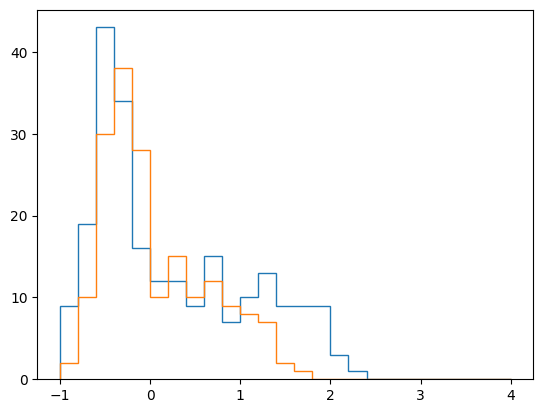

In [58]:
bins=(np.array(range(0,51))/10-1)[::2]
a=plt.hist(TESS,bins,histtype='step')
b=plt.hist(SG,bins,histtype='step')

In [59]:
print('El '+str(np.round(len(HIST2[(HIST2['DNB_BRDF_Corrected_NTL_log_P50']<=0) & (HIST2['TYPE']=='TESS-W')])/len(HIST2[(HIST2['TYPE']=='TESS-W')])*100,2))+'% de los TESS está en zonas muy oscuras (<1 nW)')
print('El '+str(np.round(len(HIST2[(HIST2['DNB_BRDF_Corrected_NTL_log_P50']<=0) & (HIST2['TYPE']=='SG')])/len(HIST2[(HIST2['TYPE']=='SG')])*100,2))+'% de los SG está en zonas muy oscuras (<1 nW)')

El 53.68% de los TESS está en zonas muy oscuras (<1 nW)
El 60.54% de los SG está en zonas muy oscuras (<1 nW)


Guardado para la Figura_2

In [60]:
guardar=pd.DataFrame({'TESS':TESS,'SG':SG})
guardar.to_csv(output+'\Figura_2a.csv',index=False)

### Cantidad de fotómetros aplicando filtros

In [61]:
HIST1=FIN[~FIN['name'].isin(Excluidos)]

Cantidades de fotómetros filtrados usados y con datos satelitales disponibles

In [62]:
TESS=HIST1[(HIST1['TYPE']=='TESS-W') & (HIST1['DNB_BRDF_Corrected_NTL_log_P50']>-1000)]['DNB_BRDF_Corrected_NTL_log_P50'].values
SG=HIST1[(HIST1['TYPE']=='SG') & (HIST1['DNB_BRDF_Corrected_NTL_log_P50']>-1000)]['DNB_BRDF_Corrected_NTL_log_P50'].values
print('Hay '+str(len(TESS))+' TESS con correspondencia satelital una vez aplicados los filtros')
print('Hay '+str(len(SG))+' SG con correspondencia satelital una vez aplicados los filtros')
SG=list(SG)+(max(len(TESS),len(SG))-len(SG))*[np.nan]
TESS=list(TESS)+(max(len(TESS),len(SG))-len(TESS))*[np.nan]

Hay 141 TESS con correspondencia satelital una vez aplicados los filtros
Hay 62 SG con correspondencia satelital una vez aplicados los filtros


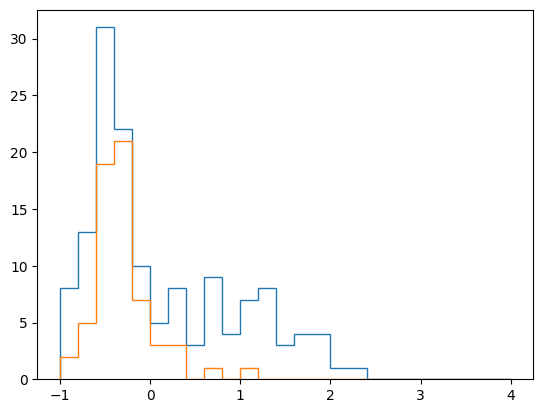

In [63]:
bins=(np.array(range(0,51))/10-1)[::2]
a=plt.hist(TESS,bins,histtype='step')
b=plt.hist(SG,bins,histtype='step')

In [64]:
guardar=pd.DataFrame({'TESS':TESS,'SG':SG})
guardar.to_csv(output+'\Figura_2b.csv',index=False)

# Regression

## Diagrama de dispersion por intervalos

Quitamos los fotómetros con excesiva RIC

In [65]:
FIN=FIN[~FIN['name'].isin(Excluidos)]

Calcula los estadísticos agrupados por intervalos

In [66]:
intervalos2=(np.array(list(range(-20,31)))/10)[::2]
BB=[Mismo_pixel(Fotometros,FIN),Mismo_pixel(Fotometros,FIN[FIN['TYPE']=='TESS-W']),Mismo_pixel(Fotometros,FIN[FIN['TYPE']=='SG'])]
names=['all','TESS','SG']
GG3=pd.DataFrame()
for ii in range(0,len(BB)):
    B=BB[ii]
    B['Q1_sat']=B['Q1_sat'].replace({np.nan:-1,np.inf:-1,-np.inf:-1})
    B['Error_fot']=(B['Q3_fot']-B['Q1_fot'])/2
    B['Error_sat']=(B['Q3_sat']-B['Q1_sat'])/2
    M=[]
    STD=[]
    N=[]
    E_FOT=[]
    E_SAT=[]
    for i in range(0,len(intervalos2[:-1])):
        m=B[B['DNB_BRDF_Corrected_NTL_log_P50'].between(intervalos2[i],intervalos2[i+1])].mean(numeric_only=True)
        std=B[B['DNB_BRDF_Corrected_NTL_log_P50'].between(intervalos2[i],intervalos2[i+1])].std(numeric_only=True)
        n=B[B['DNB_BRDF_Corrected_NTL_log_P50'].between(intervalos2[i],intervalos2[i+1])].count()
        
        E_fot=np.sqrt(sum(B[B['DNB_BRDF_Corrected_NTL_log_P50'].between(intervalos2[i],intervalos2[i+1])]['Error_fot']**2))/len(B[B['DNB_BRDF_Corrected_NTL_log_P50'].between(intervalos2[i],intervalos2[i+1])]['Error_fot'].values)
        E_sat=np.sqrt(sum(B[B['DNB_BRDF_Corrected_NTL_log_P50'].between(intervalos2[i],intervalos2[i+1])]['Error_sat']**2))/len(B[B['DNB_BRDF_Corrected_NTL_log_P50'].between(intervalos2[i],intervalos2[i+1])]['Error_sat'].values)
        
        
        M=M+[m]
        STD=STD+[std]
        N=N+[n]
        
        E_FOT=E_FOT+[E_fot]
        E_SAT=E_SAT+[E_sat]
        
    G3=pd.DataFrame(M)[['P50_fot','DNB_BRDF_Corrected_NTL_log_P50','E_sist_fot','E_sist_sat','Error_fot','Error_sat']]
    G3['E_alt_fot']=pd.DataFrame(STD)['P50_fot'].replace({np.nan:0})/pd.DataFrame(N)['P50_fot']
    G3['E_alt_sat']=pd.DataFrame(STD)['DNB_BRDF_Corrected_NTL_log_P50'].replace({np.nan:0})/pd.DataFrame(N)['DNB_BRDF_Corrected_NTL_log_P50']
    
    G3['Error_fot']=E_FOT
    G3['Error_sat']=E_SAT
    
    G3['E_fot_t']=np.sqrt(G3['E_sist_fot']**2+G3['Error_fot']**2+G3['E_alt_fot']**2)
    G3['E_sat_t']=np.sqrt(G3['E_sist_sat']**2+G3['Error_sat']**2+G3['E_alt_sat']**2)
    
    G3.columns=[i+'_'+names[ii] for i in list(G3.columns)]
    GG3=pd.concat([GG3, G3], axis=1,)

C:\Users\borja\AppData\Local\Temp\ipykernel_7472\1740028509.py:20: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\borja\AppData\Local\Temp\ipykernel_7472\1740028509.py:21: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\borja\AppData\Local\Temp\ipykernel_7472\1740028509.py:20: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\borja\AppData\Local\Temp\ipykernel_7472\1740028509.py:21: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\borja\AppData\Local\Temp\ipykernel_7472\1740028509.py:20: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\borja\AppData\Local\Temp\ipykernel_7472\1740028509.py:21: RuntimeWarning:

invalid value encountered in scalar divide



Función que elabora el gráfico por intervalos

In [67]:
def Grafico_intervalos(tipo): #SG, TESS or all
    text='_'+tipo
    fig = px.scatter(GG3,y='P50_fot'+text,x='DNB_BRDF_Corrected_NTL_log_P50'+text,error_x="E_sat_t"+text,error_y="E_fot_t"+text)
    fig.update_yaxes(autorange="reversed")
    fig.show()

In [68]:
Grafico_intervalos('all')

Guardado para Figura_12

In [69]:
guardar=GG3
guardar.to_csv(output+'\Figura_12.csv',index=False)

### Variacion de rango

Quitamos los más oscuros por sus grandes errores

In [70]:
text='_all'
G4=GG3[ (GG3['DNB_BRDF_Corrected_NTL_log_P50'+text]>-.2 )]
y=np.array(G4['P50_fot'+text])
x=np.array(G4['DNB_BRDF_Corrected_NTL_log_P50'+text])
x=x[~np.isnan(x)]
y=y[~np.isnan(y)]

Calculamos Error cuadrático medio por la derecha e izquierda

In [71]:
Izq_Der_sq=[]
Der_Izq_sq=[]
for i in range(1,len(x)+1):
    x1=x[:i].reshape(-1,1)
    y1=y[:i].reshape(-1,1)
    lm = LinearRegression()
    lm.fit(x1,y1)
    Izq_Der_sq=Izq_Der_sq+[mean_squared_error(y1,lm.predict(x1))]
    x2=x[::-1][:i].reshape(-1,1)
    y2=y[::-1][:i].reshape(-1,1)
    lm.fit(x2,y2)
    Der_Izq_sq=Der_Izq_sq+[mean_squared_error(y2,lm.predict(x2))]
    

Grafico de Error cuadrático medio

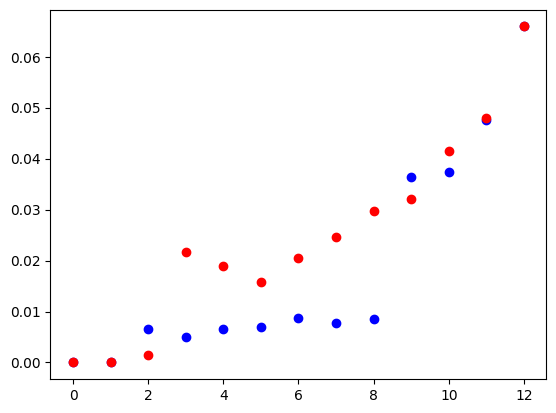

In [72]:
X=range(0,len(Izq_Der_sq))
plt.scatter(X,Izq_Der_sq[:],color='blue')
plt.scatter(X,Der_Izq_sq[:],color='red')

Guardado para la Figura_11

In [73]:
GU=pd.DataFrame({'n':np.array(X)+1})
GU['Der_Izq']=np.sqrt(Der_Izq_sq)
GU['Izq_Der']=np.sqrt(Izq_Der_sq)

In [74]:
guardar=GU
guardar.to_csv(output+'\Figura_11.csv',index=False)

## Ajuste

Quitamos los fotóemetros más oscuros por su gran error y los más brillantes por no seguir el ajuste, apartado anterior

In [75]:
foto_listado_final=FIN[(FIN['DNB_BRDF_Corrected_NTL_log_P50']>-.2) & (FIN['DNB_BRDF_Corrected_NTL_log_P50']<1.6)]

In [76]:
fotometros_finales=set(foto_listado_final['name'])

Cantidades de fotómetros usados en el ajuste final

In [77]:
print('Fotóemtros SG usados finalmente en el ajuste: '+str(len(foto_listado_final[foto_listado_final['TYPE']=='SG'])))
print('Fotóemtros TESS usados finalmente en el ajuste: '+str(len(foto_listado_final[foto_listado_final['TYPE']=='TESS-W'])))
print('En total: '+str(len(foto_listado_final[foto_listado_final['TYPE']=='SG'])+len(foto_listado_final[foto_listado_final['TYPE']=='TESS-W'])))

Fotóemtros SG usados finalmente en el ajuste: 15
Fotóemtros TESS usados finalmente en el ajuste: 57
En total: 72


Función que obtiene los parámtros de ajuste

In [78]:
def Ajuste(tipo,en_pantalla): #SG, TESS or all, en_pantalla boll
    text='_'+tipo
    G4=GG3[(GG3['DNB_BRDF_Corrected_NTL_log_P50'+text]<1.6) & (GG3['DNB_BRDF_Corrected_NTL_log_P50'+text]>-.2)]
    y=np.array(G4['P50_fot'+text])
    x=np.array(G4['DNB_BRDF_Corrected_NTL_log_P50'+text])
    borrar_inf=list(np.where(x==-np.inf)[0])+list(np.where(x==np.inf)[0])
    x=np.delete(x,borrar_inf)
    y=np.delete(y,borrar_inf)
    x1=x.reshape(-1,1)
    y1=y.reshape(-1,1)

    lm = LinearRegression()
    lm.fit(x1,y1)
    m=lm.coef_[0][0]
    n=lm.intercept_[0]
    r2=lm.score(x1,y1)
    pp=mean_squared_error(y1,lm.predict(x1))
    Em=np.sqrt(pp*len(y1)/(len(y1)-2))
    En=Em*np.sqrt(len(x1)/(len(x1)*sum(x1**2)-sum(x1)**2))[0]
    
    if en_pantalla:
        print('r^2: '+str(np.round(r2,2)))
        print('m: '+str(np.round(m,2))+'+-'+str(np.round(Em,2)))
        print('n: '+str(np.round(n,2))+'+-'+str(np.round(En,2)))
    else:
        return [np.round(r2,2),np.round(m,2),np.round(n,2),np.round(Em,2),np.round(En,2)]
    

In [79]:
Grafico_intervalos('all')
Ajuste('all',True)

r^2: 0.96
m: -0.95+-0.1
n: 20.93+-0.07


In [80]:
Grafico_intervalos('TESS')
Ajuste('TESS',True)

r^2: 0.96
m: -0.96+-0.11
n: 20.93+-0.07


In [81]:
Grafico_intervalos('SG')
Ajuste('SG',True)

r^2: 0.83
m: -0.89+-0.24
n: 20.94+-0.24


# VALVERDE DE BURGUILLOS

## Histograma Valverde mismo pixel

Cantidad de fotómetros

In [82]:
print('Hay '+str(len(Fotometros[Fotometros['town']=='Valverde de Burguillos']))+' fotómetros en Valverde de Burguillos')

Hay 19 fotómetros en Valverde de Burguillos


Función que le das un vector de vectores y los hace todos de la misma longitud

In [83]:
def Igualar_longitud(V):
    V=[list(i) for i in V]
    v1=[len(i) for i in V]
    print(v1)
    W=[]
    for j in V:
        W=W+[j+(max(v1)-len(j))*[None]]
    v2=[len(i) for i in W]
    return W

Histograma de los 4 fotómetros en el mismo pixel

In [84]:
data_filtrado=Fotometros_registros[(Fotometros_registros['clouds']==False) & (Fotometros_registros['moon']==False) & (Fotometros_registros['galaxy']==False) & (Fotometros_registros['zodiacal']==False) ]
M=data_filtrado.groupby(['name']).median(numeric_only=True)[['mag']]
M.columns=['mediana_estricto']
data_filtrado=Fotometros_registros[(Fotometros_registros['clouds']==False) & (Fotometros_registros['moon']==False)]
data_filtrado=data_filtrado.merge(M,left_on='name',right_on='name')
data_filtrado=data_filtrado[((data_filtrado['galaxy']==False) & (data_filtrado['zodiacal']==False) & (data_filtrado['mediana_estricto']>20)) | (data_filtrado['mediana_estricto']<=20)]

LPL15_030:   P50=20.93      n=166
LPL15_045:   P50=20.5      n=772
stars767:   P50=20.7      n=2509
stars770:   P50=20.63      n=683
VIIRS:   P50=20.6      n=239


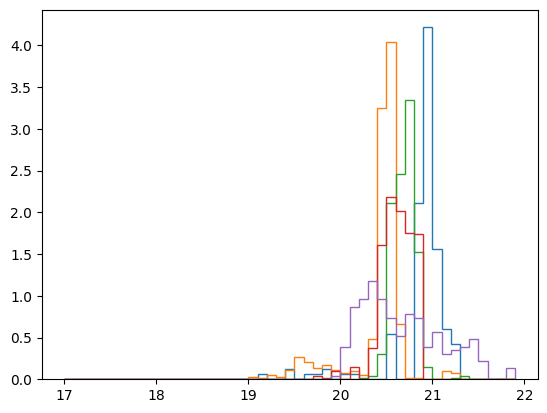

In [85]:
bins=(np.array(range(170,220))/10)
fotos=['LPL15_030','LPL15_045','stars767','stars770']
Val=[]
for i in fotos:
    a1=data_filtrado[data_filtrado['name']==i]['mag'].values
    a=plt.hist(a1,bins,histtype='step',density=True)
    print(i+':   P50='+str(np.round(np.median(a1),2))+'      n='+str(len(a1)))
    Val=Val+[a1]
ajus=Ajuste('all',False)
e1=Registros_corr_F[Registros_corr_F['name']=='LPL15_030']['DNB_BRDF_Corrected_NTL_log'].values*ajus[1]+ajus[2]
print('VIIRS'+':   P50='+str(np.round(np.median(e1),2))+'      n='+str(len(e1)))
e=plt.hist(e1,bins,histtype='step',density=True)
Val=Val+[e1]

In [86]:
guar=Igualar_longitud(Val)
guardar=pd.DataFrame({'LPL15_030':guar[0],'LPL15_045':guar[1],'stars767':guar[2],'stars770':guar[3],'sat':guar[4]})
guardar.to_csv(output+'\Figura_13.csv',index=False)

[166, 772, 2509, 683, 239]


## Elaboración del mapa

Obtenemos los datos para el mapa de Valverde

In [87]:
Valverde=pd.read_csv(input_satellite_valverde)

Elaboramos el dataset de los datos satélite

In [88]:
Valverde['Date']=pd.to_datetime(Valverde['Date'])
Valverde=Valverde[(Valverde['Cloud_Detection_Results']=='Confident_clear') & (Valverde['Shadow_Detected']=='No') & (Valverde['Cirrus_Detection']=='No_cloud')]
Valverde=Valverde.dropna()
Valverde['DNB_BRDF_Corrected_NTL_log']=np.log10(Valverde['DNB_BRDF-Corrected_NTL'])
V=pd.DataFrame(list(Valverde.groupby(['lon','lat']).median(numeric_only=True).index))
V.columns=['lon','lat']
V['DNB_BRDF_Corrected_NTL_log']=Valverde.groupby(['lon','lat']).median(numeric_only=True)['DNB_BRDF_Corrected_NTL_log'].values
V=V.sort_values(['lon','lat'])

c:\Users\borja\anaconda3\envs\EELabs2\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10



Los datos satélite lo ponemos en forma de matriz según su latitud o longitud

In [89]:
LON,LAT=len(set(V['lon'])),len(set(V['lat']))
LONGITUD=np.transpose(V['lon'].values.reshape(LON,LAT))[::-1]
LATITUD=np.transpose(V['lat'].values.reshape(LON,LAT))[::-1]
VALORES=np.transpose(V['DNB_BRDF_Corrected_NTL_log'].values.reshape(LON,LAT))[::-1]
Errores=np.sqrt((VALORES*ajus[3])**2+(ajus[4])**2+(ajus[1]*.1/np.log(10)/10**VALORES)**2)

Elaboramos el dataset de los datos de los fotómetros

In [90]:
Fotometros_Valverde=Fotometros[(Fotometros['latitude']>=min(V['lat'])) & (Fotometros['latitude']<=max(V['lat'])) & (Fotometros['longitude']>=min(V['lon'])) & (Fotometros['longitude']<=max(V['lon']))]
Fot_Valverde=data_filtrado[['name','mag']].groupby(['name']).median().merge(Fotometros_Valverde[['name','latitude','longitude']],left_on='name',right_on='name')
Fot_Valverde=data_filtrado[['name','mag']].groupby(['name']).quantile(.25).merge(Fot_Valverde,left_on='name',right_on='name')
Fot_Valverde=data_filtrado[['name','mag']].groupby(['name']).quantile(.75).merge(Fot_Valverde,left_on='name',right_on='name')
col=list(Fot_Valverde.columns)
col[1]='Q3'
col[2]='Q1'
col[3]='mag'
Fot_Valverde.columns=col
Fot_Valverde=data_filtrado[['name','mag']].groupby(['name']).count().merge(Fot_Valverde[['name','mag','Q1','Q3','latitude','longitude']],left_on='name',right_on='name')
Fot_Valverde.columns=[Fot_Valverde.columns[0]]+['n','mag']+list(Fot_Valverde.columns[3:].values)

Escala de colorres para el mapeado

In [91]:
Colores=__mag_colors = ["#D01A2B","#CE222A","#CC2B29","#CB3428","#CB4327","#CD4E26","#D25A25","#D86824","#DE7823","#E48A22","#E89E21","#EEAB20","#F2B71F","#F6C31E","#FECD1E","#F8D11F","#EBCE20","#DEC921","#CCC521","#BAC221","#A8BE21","#94BC21","#7FBA23","#6CB928","#58B92D","#4CBA36","#42BC40","#3ABE4C","#35C05B","#32C26A","#2FC578","#2CC886","#28C994","#24C8A3","#21C5B0","#1EC1BD","#1ABCC9","#17B2D1","#14A6D6","#119ADA","#118EDC","#1382DC","#1576DC","#176ADC","#195EDB","#1B52D9","#1D46D7","#1F3AD5","#212ED3","#2324D1","#261CCE","#2D19CB","#341AC8","#3B1BC4","#421DBF","#491FBA","#5021B4","#5523AB","#5825A2","#5B2799"]
Min_escala=20.3 
Max_escala=21.5
Step_escala=12
cm=branca.colormap.LinearColormap(Colores,vmin=Min_escala, vmax=Max_escala).to_step(Step_escala)

Tranformar los valores a la escala de colores correspondiente

In [92]:
inter=round((Max_escala-Min_escala)/Step_escala,10)
Leyenda_escala=[round(Min_escala+i*inter,10) for i in range(0,Step_escala+1)]
Colores_RGB=np.array(cm.colors)*255
Colores_RGB[:,3]=np.array([200]*len(Colores_RGB[:,3]))

In [93]:
a=(VALORES*ajus[1]+ajus[2])
CZ=np.round(np.trunc(a*1/inter)*inter,4)
PZ=(CZ-Min_escala)/inter
PZ=np.round(PZ,2).astype('int')

In [94]:
for i in list(set(PZ.reshape(-1))):
    Col=[]
    for i in PZ.reshape([-1]):
        Col=Col+[Colores_RGB[i].astype('int')]
Col=np.array(Col).reshape(PZ.shape[0],PZ.shape[1],4)
Col=Col/255
Col[0,0,3]=1

In [95]:
CZ=np.round(np.trunc(Fot_Valverde['mag']*1/inter)*inter,4)
PZ=(CZ-Min_escala)/inter
PZ=np.round(PZ,2).values.astype('int')

In [96]:
for i in list(set(PZ.reshape(-1))):
    Color=[]
    for i in PZ.reshape([-1]):
        Color=Color+[Colores_RGB[i].astype('int')]
Color=np.array(Color).reshape(-1,4)
Fot_Valverde['Color']=list(Color)

Obtener las coordenadas de las esquinas del mapa

In [97]:
paso_lat=(max(V['lat'])-min(V['lat']))/len(set(V['lat']))
paso_lon=(max(V['lon'])-min(V['lon']))/len(set(V['lon']))
Esquina_sup_izq=max(V['lat'])+paso_lat/2,min(V['lon'])-paso_lon/2
Esquina_inf_dere=min(V['lat'])-paso_lat/2,max(V['lon'])+paso_lon/2

Funciiones para pasar de código RGB a hexadecimal

In [98]:
def poner_ceros(a):
    if len(a)<2:
        return '0'+a
    else:
        return a
def rgb_to_hex(v): #Función cambio rgb a hex
    r,g,b=v
    r=poner_ceros(('{:X}').format(r))
    g=poner_ceros(('{:X}').format(g))
    b=poner_ceros(('{:X}').format(b))
    return r+g+b

Elaboración del mapa

In [99]:
geomap = folium.Map([(Esquina_sup_izq[0]+Esquina_inf_dere[0])/2, (Esquina_sup_izq[1]+Esquina_inf_dere[1])/2], zoom_start=14, 
                    max_zoom = 15, min_zoom=9,
                    max_lat=Esquina_sup_izq[0]+2,max_lot=Esquina_sup_izq[1]+2,min_lat=Esquina_inf_dere[0]-2,min_lot=Esquina_inf_dere[1]-2,max_bounds=True)
geomap =folium.Map([37, 0], zoom_start=3)  

In [100]:
Grupo = folium.FeatureGroup(name='Estaciones', show=False) 
for i in range(0,len(Fot_Valverde)):
    if Fot_Valverde['n'][i]>500:
        aro='black'
    else:
        aro='red'
    if Fot_Valverde['mag'][i]<21.12:
        folium.CircleMarker(location=[Fot_Valverde['latitude'][i],Fot_Valverde['longitude'][i]], popup=Fot_Valverde['mag'][i], fill_color='#'+rgb_to_hex(list(Fot_Valverde['Color'][i])[:-1]), radius=6, weight=2, color=aro,fill_opacity=.9).add_to(Grupo)
    else:
        folium.RegularPolygonMarker(rotation=45,location=[Fot_Valverde['latitude'][i],Fot_Valverde['longitude'][i]], popup=Fot_Valverde['mag'][i], fill_color='#'+rgb_to_hex(list(Fot_Valverde['Color'][i])[:-1]), radius=8, weight=2, color=aro,fill_opacity=.9).add_to(Grupo)       
Grupo.add_to(geomap)

In [101]:
img = folium.raster_layers.ImageOverlay(
        name="Mapa de color",
        image=Col,
        bounds=[Esquina_sup_izq, Esquina_inf_dere],
        mercator_project=False,
      )
img.add_to(geomap)
geomap.add_child(cm)

### Propiedades del mapa

In [102]:
print('Altura: '+str(len(a))+' píxeles')
print('Anchura: '+str(len(a[0]))+' píxeles')

Altura: 16 píxeles
Anchura: 29 píxeles


In [103]:
print('Máxima diferencia de magnitudes entre dos píxles contiguos: '+str(np.round(max(np.abs(a[:-1,:]-a[1:,:]).max(),np.abs(a[:,:-1]-a[:,1:]).max()),1))+' mag')

Máxima diferencia de magnitudes entre dos píxles contiguos: 0.7 mag


### Tabla comparativa satelite y fotómetros

Funcion para calcular distancias entre dos coordenadas

In [104]:
def distancia(lat1, lon1, lat2, lon2):
    rad=np.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(np.sin(rad*dlat/2))**2 + np.cos(rad*lat1)*np.cos(rad*lat2)*(np.sin(rad*dlon/2))**2
    distancia=2*R*np.arcsin(np.sqrt(a))
    return distancia

Generamos el dataset de comparación datos satélite y fotóemtros

In [105]:
D1=[]
Valor1=[]
E=[]
for i in range(0,len(Fot_Valverde)):
    d=distancia(LATITUD,LONGITUD,Fot_Valverde['latitude'].values[i],Fot_Valverde['longitude'].values[i])
    min1=[i[0] for i in np.where(d==d.min())]
    
    D1=D1+[d.min()]
    Valor1=Valor1+[a[min1[0],min1[1]]]
    E=E+[Errores[min1[0],min1[1]]]

Fot_Valverde['D1']=D1
Fot_Valverde['Valor1']=Valor1
Fot_Valverde['E']=E

In [106]:
Fot_Valverde2=Fot_Valverde[['name','mag','Q1','Q3','Valor1','E']]
for i in list(Fot_Valverde2.columns.values[1:]):
    Fot_Valverde2[i]=np.round(Fot_Valverde2[i],2)

C:\Users\borja\AppData\Local\Temp\ipykernel_7472\4171812197.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tabla comprativa fotómetros y satelite, corresponde a la Tabla 4

In [107]:
Fot_Valverde2.sort_values(['Valor1'])

,name,mag,Q1,Q3,Valor1,E
10,LPL15_043,20.69,20.61,20.77,20.30,0.10
16,stars770,20.63,20.52,20.77,20.57,0.08
11,LPL15_045,20.50,20.43,20.54,20.57,0.08
15,stars767,20.70,20.60,20.76,20.57,0.08
9,LPL15_030,20.93,20.89,21.00,20.57,0.08
14,LPL15_057,20.86,20.79,20.92,20.64,0.08
7,LPL15_027,21.12,21.04,21.17,21.02,0.09
12,LPL15_046,21.08,21.01,21.14,21.08,0.09
2,LPL15_006,20.94,20.86,20.99,21.14,0.10
5,LPL15_011,21.17,21.10,21.21,21.14,0.10


### Diferencia entre valores satelite y fotómetros

In [108]:
print('Diferencia media todos los fotóemtros: '+str(np.round(sum(np.abs(Fot_Valverde2['mag']-Fot_Valverde2['Valor1']))/len(Fot_Valverde2),2))+' mag')

Diferencia media todos los fotóemtros: 0.18 mag


In [109]:
print('Diferencia máxima todos los fotóemtros: '+str(np.round(max(np.abs(Fot_Valverde2['mag']-Fot_Valverde2['Valor1'])),2))+' mag')

Diferencia máxima todos los fotóemtros: 0.39 mag


In [110]:
fuera_rango=Fot_Valverde2[Fot_Valverde2['Valor1']>21.12]

In [111]:
print('Diferencia media fotómetros oscuros fuera del ajuste: '+str(np.round(sum(np.abs(fuera_rango['mag']-fuera_rango['Valor1']))/len(fuera_rango),2))+' mag')

Diferencia media fotómetros oscuros fuera del ajuste: 0.19 mag


In [112]:
print('Diferencia máxima fotómetros oscuros fuera del ajuste: '+str(np.round(max(np.abs(fuera_rango['mag']-fuera_rango['Valor1'])),2))+' mag')

Diferencia máxima fotómetros oscuros fuera del ajuste: 0.27 mag


In [113]:
dentro_rango=Fot_Valverde2[Fot_Valverde2['Valor1']<21.12]

In [114]:
print('Diferencia media fotómetros dentro del ajuste: '+str(np.round(sum(np.abs(dentro_rango['mag']-dentro_rango['Valor1']))/len(dentro_rango),2))+' mag')

Diferencia media fotómetros dentro del ajuste: 0.17 mag


In [115]:
print('Diferencia máxima fotómetros dentro del ajuste: '+str(np.round(max(np.abs(dentro_rango['mag']-dentro_rango['Valor1'])),2))+' mag')

Diferencia máxima fotómetros dentro del ajuste: 0.39 mag


# Curva de evolución de la incertidumbre satélite

(0.0, 0.5)

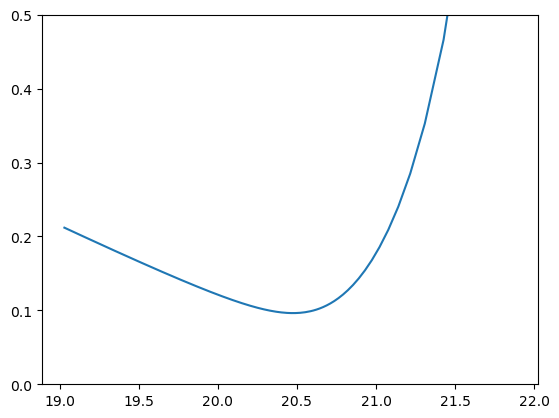

In [ ]:
VIIRS=np.array(range(1,1000))/10
Y=np.sqrt(.1/(np.log(10)*VIIRS)**2+(ajus[3]*np.log10(VIIRS))**2+(ajus[4])**2)
X=np.log10(VIIRS)*ajus[1]+ajus[2]
plt.plot(X,Y)
plt.ylim(0,.5)